In [19]:
# installing Python3.9

!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py39" --user

--2025-02-26 18:34:52--  https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61451533 (59M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  58.60M  95.3MB/s    in 0.6s    

2025-02-26 18:34:53 (95.3 MB/s) - ‘mini.sh’ saved [61451533/61451533]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2020.12.8=h06a4308_0
    - certifi==2020.12.5=py39h06a4308_0
    - cffi==1.14.4=py39h261ae71_0
    - chardet==3.0.4=py39h06a4308_1003
    - conda-package-handling==1.7.2=py39h27cf

In [20]:
!python --version

Python 3.9.21


In [22]:
# Import required libraries

import itertools
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from tensorflow.keras import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [23]:
# load dataset
data = load_iris()

In [24]:
# get to know about the dataset
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [25]:
# data
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [26]:
# get labels of the data points
labels = data["target_names"]

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"], test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

In [27]:
# using StandardScaler to normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# get a peek into the data after normalising
X_train[:5]

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097]])

In [29]:
# check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_onehot, y_test_onehot

((105, 4), (45, 4), (105,), (45,), (105, 3), (45, 3))

In [30]:
# define hyperparameters
batch_sizes = [2, 4]
rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

params = list(itertools.product(batch_sizes, rates, epochs))
params

[(2, 0.001, 1),
 (2, 0.001, 3),
 (2, 0.001, 5),
 (2, 1e-05, 1),
 (2, 1e-05, 3),
 (2, 1e-05, 5),
 (4, 0.001, 1),
 (4, 0.001, 3),
 (4, 0.001, 5),
 (4, 1e-05, 1),
 (4, 1e-05, 3),
 (4, 1e-05, 5)]

In [31]:
# list to store models and results
models_arr = []

# train models and append the data to models_arr
for para in params:
  print()
  print(para)
  print("-"*20)

  # create a new model
  model = Sequential()
  model.add(Input((4,)))
  model.add(Dense(units=4, activation='relu'))
  model.add(Dense(units=16, activation='relu'))
  model.add(Dense(units=3, activation='softmax'))

  # initialize optimizer
  optimizer = Adam(learning_rate=para[1])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # train model
  t = model.fit(X_train,
            y_train_onehot,
            epochs=para[2],
            batch_size=para[0],
            validation_data=(X_test, y_test_onehot)
  )

  # get predictions
  y_prediction = np.argmax(model.predict(X_test), axis = 1)

  # put the results in the dictionary
  d = {}
  d["model"] = model
  d["accuracy"] = accuracy_score(y_test, y_prediction)
  d["f1_score"] = f1_score(y_test, y_prediction, average="micro")
  d["confusion_matrix"] = confusion_matrix(y_prediction, y_test)

  # put the dictionary in the models_arr
  models_arr.append(d)


(2, 0.001, 1)
--------------------
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1658 - loss: 1.2106 - val_accuracy: 0.6444 - val_loss: 0.9966
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

(2, 0.001, 3)
--------------------
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6819 - loss: 0.8746 - val_accuracy: 0.6667 - val_loss: 0.7243
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6273 - loss: 0.7461 - val_accuracy: 0.6667 - val_loss: 0.6266
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6227 - loss: 0.7285 - val_accuracy: 0.6444 - val_loss: 0.5634
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

(2, 0.001, 5)
--------------------
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3659 - loss: 1.2413 - val_accuracy: 0.2889 - val_loss: 1.0775
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3732 - loss: 1.1216 - val_accuracy: 0.3778 - val_loss: 1.0021
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4831 - loss: 

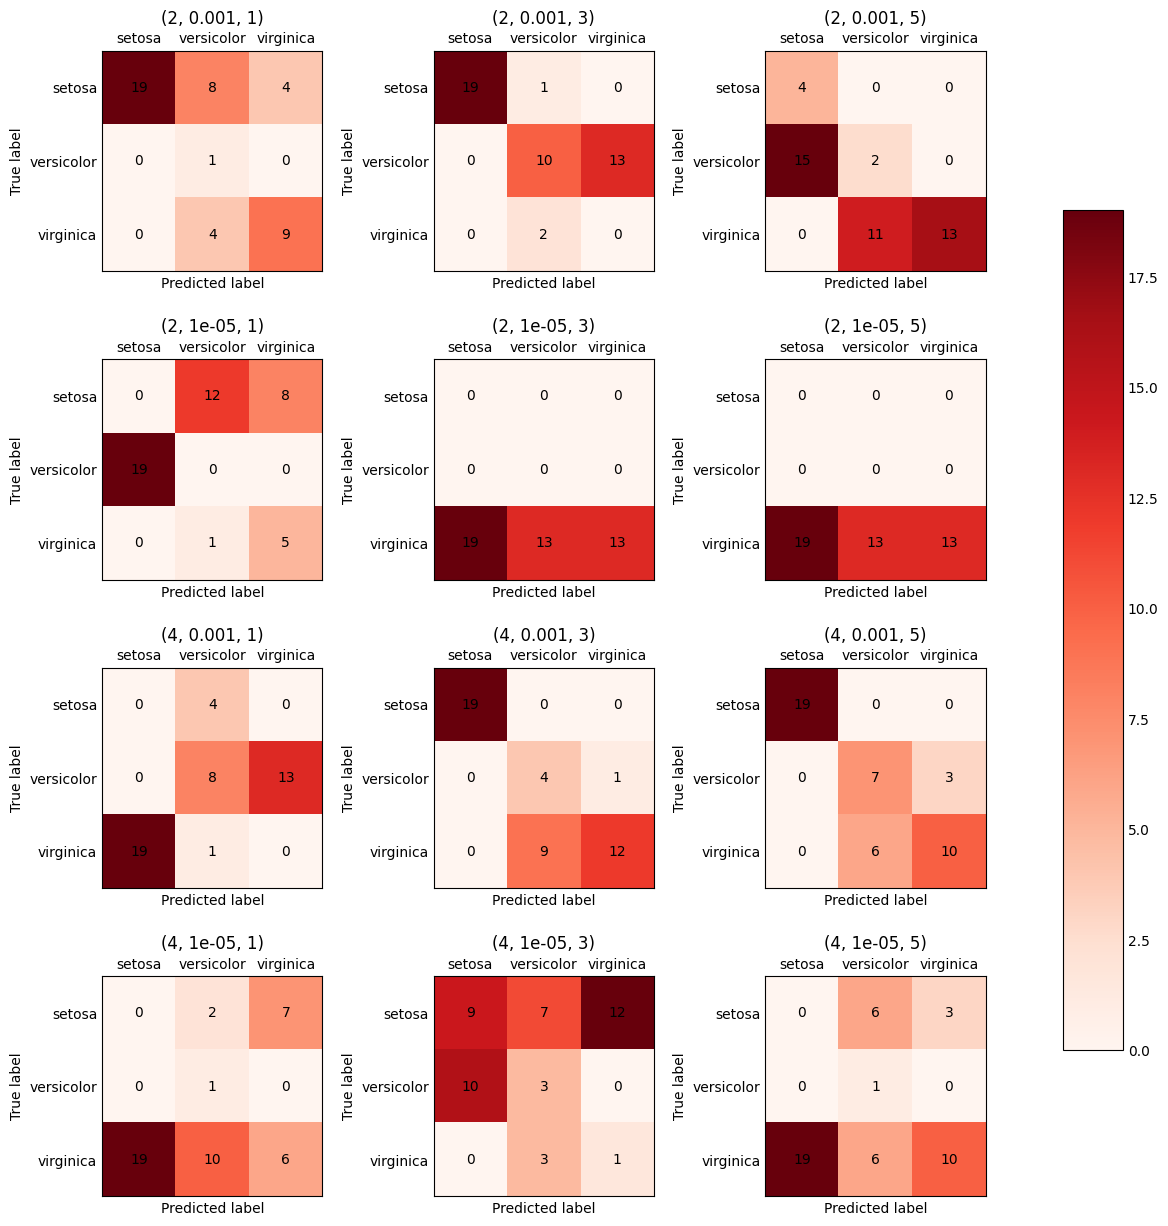

In [32]:
# Visualising Confusion matrices for each element of hyperparameter space

from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('_mpl-gallery-nogrid')

fig, axs = plt.subplots(4,3, figsize = (12,12))
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

axs = axs.flatten()

for i,para in enumerate(params):
  axs[i].set_xticks([0,1,2], labels)
  axs[i].set_yticks([0,1,2], labels)

  axs[i].set_xlabel("Predicted label")
  axs[i].set_ylabel("True label")

  im = axs[i].imshow(models_arr[i]["confusion_matrix"], cmap="Reds", origin = "upper")

  axs[i].tick_params(top=True, bottom=False,
                  labeltop=True, labelbottom=False)

  for j in range(len(labels)):
    for k in range(len(labels)):
        text = axs[i].text(k, j, models_arr[i]["confusion_matrix"][j, k], ha="center", va="center", color="k")
  axs[i].set_title(para)

fig.colorbar(im, cax=cbar_ax)
plt.subplots_adjust(hspace=0.4, wspace = 0.3)
plt.show()

In [33]:
# get index of random samples
random_samples = np.random.choice(X_test.shape[0],5)
random_samples

array([32, 44, 44,  2, 33])

In [35]:
# showing true and predicted value for five datapoints for all models
for para,model in zip(params,models_arr):
  model = model["model"]
  print("\n\nModel with (batch_size, learning_rate, epochs):",para)
  print("-"*80)
  print("Sno. | Sample \t\t\t\t\t\t| True Value \t| Predicted value")
  print("-"*80)
  for i,sample in enumerate(random_samples):
    print(f"{i}) | {X_test[sample]} \t| {y_test[sample]} \t\t|{np.argmax(model.predict(np.array([X_test[sample]]), verbose = 0), axis = 1).item()}")



Model with (batch_size, learning_rate, epochs): (2, 0.001, 1)
--------------------------------------------------------------------------------
Sno. | Sample 						| True Value 	| Predicted value
--------------------------------------------------------------------------------
0) | [1.033541   0.21701605 0.30909579 0.2177459 ] 	| 1 		|0
1) | [-0.53399618  1.65617512 -1.38370397 -1.40568508] 	| 0 		|0
2) | [-0.53399618  1.65617512 -1.38370397 -1.40568508] 	| 0 		|0
3) | [ 2.23933883 -0.98228318  1.76840592  1.43531914] 	| 2 		|0
4) | [-1.25747488  0.93659559 -1.32533157 -1.40568508] 	| 0 		|0


Model with (batch_size, learning_rate, epochs): (2, 0.001, 3)
--------------------------------------------------------------------------------
Sno. | Sample 						| True Value 	| Predicted value
--------------------------------------------------------------------------------
0) | [1.033541   0.21701605 0.30909579 0.2177459 ] 	| 1 		|1
1) | [-0.53399618  1.65617512 -1.38370397 -1.40568508] 	| 0 		

## Task 2: Automated Hyperparameter Search (20%)

In [42]:
!pip install autogluon

  Using cached autogluon-1.2-py3-none-any.whl (9.6 kB)
  Using cached autogluon.core-1.2-py3-none-any.whl (266 kB)
  Using cached autogluon.common-1.2-py3-none-any.whl (68 kB)
  Using cached autogluon.features-1.2-py3-none-any.whl (64 kB)
  Using cached autogluon.multimodal-1.2-py3-none-any.whl (429 kB)
  Using cached accelerate-0.34.2-py3-none-any.whl (324 kB)
  Using cached autogluon.tabular-1.2-py3-none-any.whl (352 kB)
  Using cached autogluon.timeseries-1.2-py3-none-any.whl (174 kB)
  Using cached boto3-1.37.1-py3-none-any.whl (139 kB)
  Using cached botocore-1.37.1-py3-none-any.whl (13.4 MB)
  Using cached catboost-1.2.7-cp39-cp39-manylinux2014_x86_64.whl (98.7 MB)
  Using cached coreforecast-0.0.12-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (196 kB)
  Using cached einops-0.8.1-py3-none-any.whl (64 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl (84 kB)
  Using cached datasets-3.3.2-py3-none-any.whl (485 kB)
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Us

In [37]:
!pip install ray -q

     |████████████████████████████████| 67.3 MB 58 kB/s 


In [38]:
df_best = pd.DataFrame(columns=["Algorithm", "Configuration", "Accuracy", "F1 score"])

### Grid Search

In [39]:
# Using previously trained models in models_arr
accuracy_arr = []
for model in models_arr:
  accuracy_arr.append(model["accuracy"])

best_grid_idx = np.argmax(accuracy_arr)

df_best.loc[len(df_best)] = ["Grid Search", params[best_grid_idx], models_arr[best_grid_idx]["accuracy"], models_arr[best_grid_idx]["f1_score"]]

### Random Search using Autogluon

In [40]:
from ray import tune
from autogluon.multimodal import MultiModalPredictor

predictor_hpo_random = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "random",
    "scheduler": "FIFO",
    "num_trials": 10,
    "num_to_keep": 3,
}

predictor_hpo_random.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

predictor_hpo_random.leaderboard()

OSError: /usr/local/lib/python3.11/dist-packages/torchaudio/lib/libtorchaudio.so: undefined symbol: _ZNK3c105Error4whatEv

The Autogluon library has some issue due to which we are not able to import the library.

We have tried using Python 3.12.8 (local), Python 3.11.11 (colab) and Python 3.9.1 (colab) with Autogluon 1.1.1 and 1.2.0, but nonetheless it did not work.

### Bayesian Search using Autogluon

In [ ]:
predictor_hpo_bayes = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "bayes",
    "scheduler": "FIFO",
    "num_trials": 10,
    "num_to_keep": 3,
}

predictor_hpo_bayes.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

### Hyperland Search using Autogluon

In [ ]:
predictor_hpo_bayes_h = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "bayes",
    "scheduler": "ASHA"
    "num_trials": 10,
    "num_to_keep": 3,
}

predictor_hpo_bayes_h.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)